<a href="https://colab.research.google.com/github/SMITamim/Churn-Prediction-Tours-travel/blob/main/T%26T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syedtamim","key":"2cf9d332064a6727dc37b9b7885c2542"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25           1109         40  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00            800         27  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10           1008         35  1.0              
datascientistanna/customers-dataset                           Shop Customer Data                    

In [ ]:
!kaggle datasets download -d tejashvi14/tour-travels-customer-churn-prediction


  0% 0.00/3.45k [00:00<?, ?B/s]
100% 3.45k/3.45k [00:00<00:00, 6.57MB/s]


In [ ]:
!unzip tour-travels-customer-churn-prediction.zip

Archive:  tour-travels-customer-churn-prediction.zip
  inflating: Customertravel.csv      


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates as plc
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import column_or_1d
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [14]:
customer_dt = pd.read_csv('Customertravel.csv')

In [15]:
print(customer_dt)

     Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                           No               No       0  
4

In [16]:
print(customer_dt.head())

   Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  


In [17]:
print(customer_dt.describe())

              Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000       4.000000    0.000000
max     38.000000       6.000000    1.000000


In [18]:
print(customer_dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None


In [19]:
customer_dt.drop_duplicates(inplace=True)

In [20]:
print(customer_dt['Age'].value_counts())

30    70
34    51
37    45
31    42
29    42
28    40
27    36
36    36
35    34
33    26
38    25
Name: Age, dtype: int64


In [21]:
print(customer_dt['FrequentFlyer'].value_counts())

No           250
Yes          144
No Record     53
Name: FrequentFlyer, dtype: int64


In [22]:
print(customer_dt['AnnualIncomeClass'].value_counts())

Low Income       205
Middle Income    173
High Income       69
Name: AnnualIncomeClass, dtype: int64


In [23]:
print(customer_dt['ServicesOpted'].value_counts())

1    150
4     80
2     71
3     63
5     55
6     28
Name: ServicesOpted, dtype: int64


In [24]:
print(customer_dt['AccountSyncedToSocialMedia'].value_counts())

No     261
Yes    186
Name: AccountSyncedToSocialMedia, dtype: int64


In [25]:
print(customer_dt['BookedHotelOrNot'].value_counts())

No     258
Yes    189
Name: BookedHotelOrNot, dtype: int64


In [26]:
print(customer_dt['Target'].value_counts())

0    325
1    122
Name: Target, dtype: int64


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='Target'>

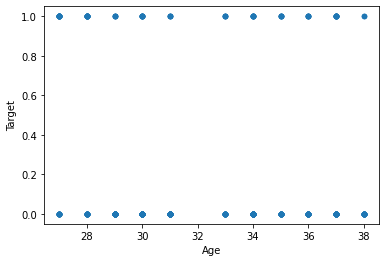

In [28]:
customer_dt.plot(kind='scatter', x='Age', y='Target')

<Axes: xlabel='Age', ylabel='Target'>

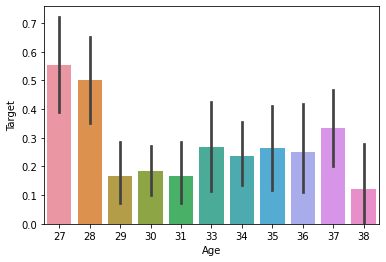

In [32]:
sns.barplot(x='Age', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='FrequentFlyer', ylabel='Target'>

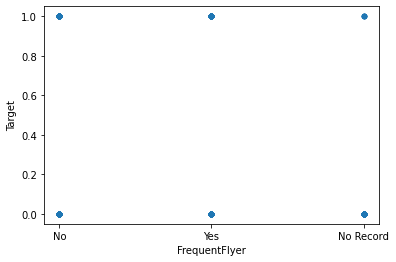

In [33]:
customer_dt.plot(kind='scatter', x='FrequentFlyer', y='Target')

<Axes: xlabel='FrequentFlyer', ylabel='Target'>

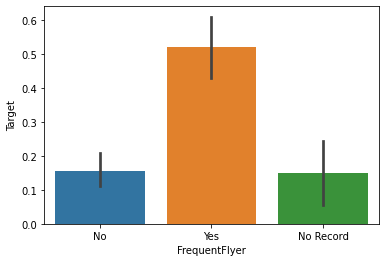

In [34]:
sns.barplot(x='FrequentFlyer', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='AnnualIncomeClass', ylabel='Target'>

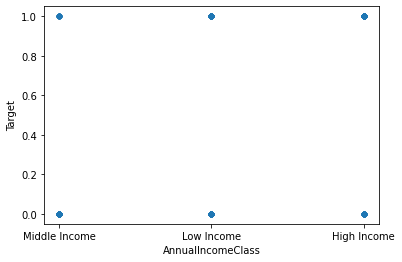

In [35]:
customer_dt.plot(kind='scatter', x='AnnualIncomeClass', y='Target')

<Axes: xlabel='AnnualIncomeClass', ylabel='Target'>

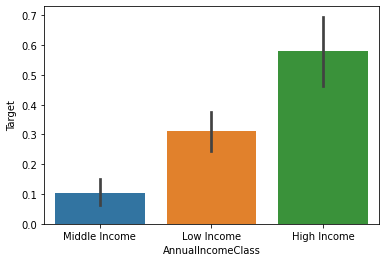

In [36]:
sns.barplot(x='AnnualIncomeClass', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='ServicesOpted', ylabel='Target'>

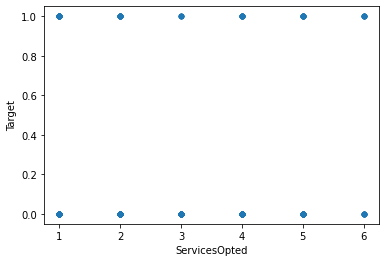

In [37]:
customer_dt.plot(kind='scatter', x='ServicesOpted', y='Target')

<Axes: xlabel='ServicesOpted', ylabel='Target'>

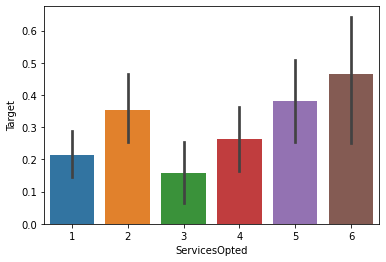

In [38]:
sns.barplot(x='ServicesOpted', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='AccountSyncedToSocialMedia', ylabel='Target'>

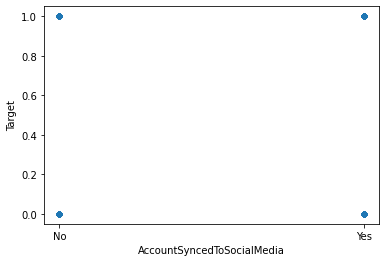

In [39]:
customer_dt.plot(kind='scatter', x='AccountSyncedToSocialMedia', y='Target')

<Axes: xlabel='AccountSyncedToSocialMedia', ylabel='Target'>

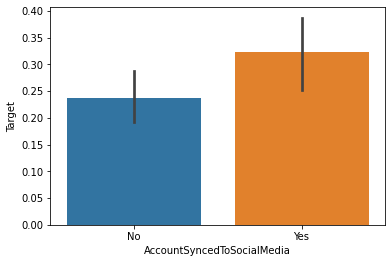

In [40]:
sns.barplot(x='AccountSyncedToSocialMedia', y='Target', data=customer_dt)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='BookedHotelOrNot', ylabel='Target'>

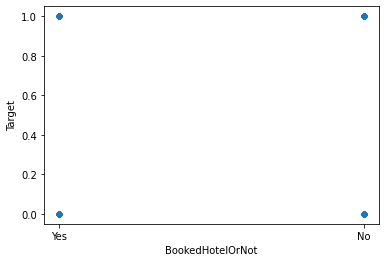

In [41]:
customer_dt.plot(kind='scatter', x='BookedHotelOrNot', y='Target')

<Axes: xlabel='BookedHotelOrNot', ylabel='Target'>

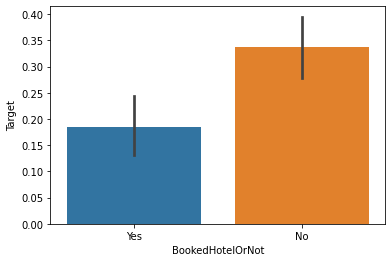

In [42]:
sns.barplot(x='BookedHotelOrNot', y='Target', data=customer_dt)

In [43]:
customer_dt_new = customer_dt.drop(['AccountSyncedToSocialMedia'], axis=1)

In [44]:
print(customer_dt_new.keys())

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'BookedHotelOrNot', 'Target'],
      dtype='object')


<Axes: xlabel='Age'>

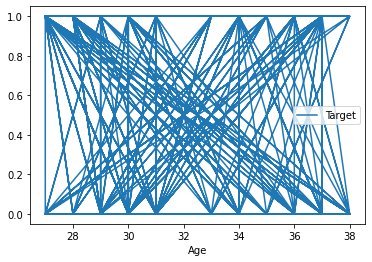

In [45]:
customer_dt.plot(x='Age', y='Target')